# Letramentro Digital - Mini-projeto
# Aulas 8, 9 e 10

# Organização desta Etapa

Nesta última etapa vamos desenvolver juntos um pequeno projeto de análise de dados. O objetivo é colocar em prática os conhecimentos adquiridos durante o curso de Python e nos preparar para os próximos módulos.

Abaixo o cronograma da última etapa:

|Dia|Assunto|
|---|---|
|06/10|Discussão sobre Análise Exploratória de Dados e Definição do Conjunto de Dados|
|08/10|Hands-on sobre os dados|
|13/10|Apresentação de projetos e encerramento|

# Análise Exploratória de Dados


A Análise Exploratória de Dados é uma técnica usada por cientistas de dados para resumir as principais características de um conjunto de dados e verificar a qualidade destes. Trata-se então da primeira atividade a ser feita em um projeto de Inteligência Artificial. Afinal, se os dados não forem corretamente tratados, os modelos de Inteligência Artificial terão dificuldades em fazer inferências. Isso é resumido em uma máxima: *"Garbage In, Garbage Out"*.

Análise Exploratória de Dados emprega estatística e outros métodos de visualização de dados para identificar padrões gerais, detectar anomalias nos dados e descobrir relacionamentos prévios que auxiliem os processos subsequentes.

A Análise Exploratória de Dados envolve 3 etapas:

1. **Entrada de dados**
2. **Execução da análise estatística**
3. **Interpretação de resultados**

### Variáveis

Dados costumam ser amostras coletadas sobre um determinado problema de interesse (ex: determinar se os estudantes da UFPA são obesos). Contudo, o processo de coleta contempla não apenas a informação de interesse imediato (ex: peso dos estudantes), mas diversas outras informações que auxiliarão no entendimento desta característica (ex: sexo, altura, idade, hábitos etc).

Cada uma das características da população amostrada (ex: peso, altura, sexo,idade etc), é denominada de uma **variável**. E nos conjuntos de dados estas variáveis são representadas em colunas.

As variáveis podem assumir diferentes valores, que basicamente podem ser separados em:

- **Quantitativos ou numéricos**
- **Qualitativos ou categóricos**

As variáveis numéricas podem ser:

- **Discretas**: assumem apenas valores inteiros. Ex.: número de irmãos, número de passageiros
- **Contínuas**: assumem qualquer valor no intervalo dos números reais. Ex.: peso, altura

As variáveis categóricas podem ser:

- **Nominais**: quando as categorias não possuem uma ordem natural. Ex.: nomes, cores, sexo
- **Ordinais**: quando as categorias podem ser ordenadas. Ex.: tamanho (pequeno, médio, grande), classe social (baixa, média, alta), grau de instrução (básico, médio, graduação, pós-graduação)

### Análise Univariada


A **análise univariada** é o primeiro passo na análise exploratória de dados, focando no estudo de **uma variável por vez**. Este tipo de análise nos permite compreender o comportamento individual de cada variável.

Para esta análise pode-se:

1. **Usar recursos descritivos** que resumam a variável:
   - **Tabelas** de frequência
   - **Gráficos** apropriados para o tipo de variável
   - **Medidas** de posição, dispersão e forma

2. **Analisar o comportamento** da variável:
   - Entender a **distribuição** dos valores
   - Identificar **padrões** e **anomalias**
   - Detectar valores discrepantes (**outliers**)

Neste notebook, utilizaremos **Seaborn** e **Matplotlib** para criar visualizações que tornem os conceitos estatísticos mais claros e intuitivos.


In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [ ]:
# Configurações para visualizações
plt.style.use('default')
sns.set_style('whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print('Configurações de visualização definidas!')

Configurações de visualização definidas!


### Carregando os Dados

Agora vamos carregar os datasets que usaremos durante nossa análise.

In [ ]:
# Carregando o dataset de casas
casas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv', sep=';')

print('Dataset de casas carregado!')
print(f'Total de registros: {len(casas)}')
print(f'Colunas disponíveis: {list(casas.columns)}')

Dataset de casas carregado!
Total de registros: 32960
Colunas disponíveis: ['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor', 'Condominio', 'IPTU']


In [ ]:
np.random.seed(42)  # Para reprodutibilidade
salarios_data = {
    'salarios': [
        4500, 5200, 3800, 6100, 4800, 5500, 4200, 5800, 4600, 5000,
        3900, 6200, 4700, 5300, 4100, 5700, 4400, 5600, 4300, 5100
    ]
}
salarios = pd.DataFrame(salarios_data)

print('Dataset de salários criado!')
print(f'Total de registros: {len(salarios)}')

Dataset de salários criado!
Total de registros: 20


In [ ]:
# Visualizando os primeiros dados das casas
print('Primeiras linhas do dataset de casas:')
print(casas.head())

Primeiras linhas do dataset de casas:
                      Tipo           Bairro  Quartos  Vagas  Suites  Area  \
0                Quitinete       Copacabana        1      0       0    40   
1                     Casa  Jardim Botânico        2      0       1   100   
2  Conjunto Comercial/Sala  Barra da Tijuca        0      4       0   150   
3              Apartamento           Centro        1      0       0    15   
4              Apartamento     Higienópolis        1      0       0    48   

    Valor  Condominio    IPTU  
0  1700.0       500.0    60.0  
1  7000.0         NaN     NaN  
2  5200.0      4020.0  1111.0  
3   800.0       390.0    20.0  
4   800.0       230.0     NaN  


## Visualizando os dados

Vamos usar gráficos para entender melhor nossos dados!

- **Gráficos** ajudam a enxergar padrões, tendências e possíveis problemas nos dados.
- Tipos comuns:
  - Gráfico de barras (categorias)
  - Histograma (distribuição de valores numéricos)
  - Histograma condicional (distribuição considerando uma condição)

In [ ]:
# Informações básicas sobre o dataset
print(f'Dataset possui {casas.shape[0]} registros e {casas.shape[1]} colunas')
print(f'Colunas: {list(casas.columns)}')

# Tipos de dados e estatísticas básicas
print('\nTipos de dados:')
print(casas.dtypes)
print('\nPrimeiras 5 linhas:')
casas.head()

Dataset possui 32960 registros e 9 colunas
Colunas: ['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor', 'Condominio', 'IPTU']

Tipos de dados:
Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

Primeiras 5 linhas:


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


## Agora vamos criar gráficos para entender melhor a distribuição dos dados.

### Entendendo Diferentes Tipos de Gráficos

Quando olhamos para dados, é como se estivéssemos tentando entender uma história. Diferentes tipos de gráficos nos ajudam a "ler" essa história de maneiras diferentes. Vamos ver o que cada um dos nossos três gráficos está nos contando:

### **O Gráfico de Barras**
nos mostra os tipos de imóveis mais comuns no nosso dataset. Imagine que você está numa festa e quer saber quantas pessoas vieram de cada bairro da cidade. O gráfico de barras faz exatamente isso - conta quantos imóveis temos de cada tipo (apartamento, casa, quitinete, etc.). As barras mais altas mostram os tipos mais comuns.



Text(0.5, 0, 'Quantidade')

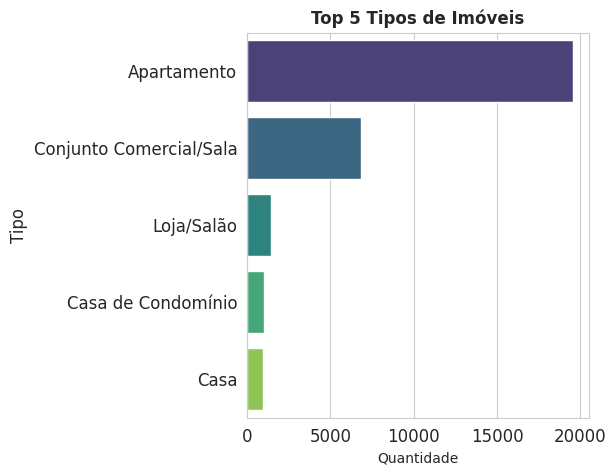

In [ ]:
# Gráficos de distribuição - Parte 1
plt.figure(figsize=(15, 5))

# Gráfico de barras: tipos de imóveis
plt.subplot(1,3,1)
tipo_counts = casas['Tipo'].value_counts().head(5)
sns.barplot(x=tipo_counts.values, y=tipo_counts.index, hue=tipo_counts.index,
           palette='viridis', legend=False)
plt.title('Top 5 Tipos de Imóveis', fontsize=12, fontweight='bold')
plt.xlabel('Quantidade', fontsize=10)

### **Os Histogramas**
Eles mostram como variáveis numéricas (como salários ou valores de aluguel) estão "espalhadas". Os dados são separados em faixas e a frequência de dados dentro de cada faixa é indicada por uma barra.

A **curva suave** que se vê sobre os histogramas é uma "linha de tendência" que nos ajuda a ver o padrão geral. Os picos da curva indicam onde os valores estão concentrados. Se a curva tem uma "cauda" longa para um lado, significa que temos alguns valores bem extremos naquela direção.

**Por que isso é importante?** Esses gráficos nos ajudam a entender se nossos dados são "normais" ou se têm alguma característica especial. Por exemplo, se vemos que a maioria dos aluguéis está numa faixa baixa, mas temos alguns poucos muito caros, isso nos diz algo importante sobre o mercado imobiliário da região.

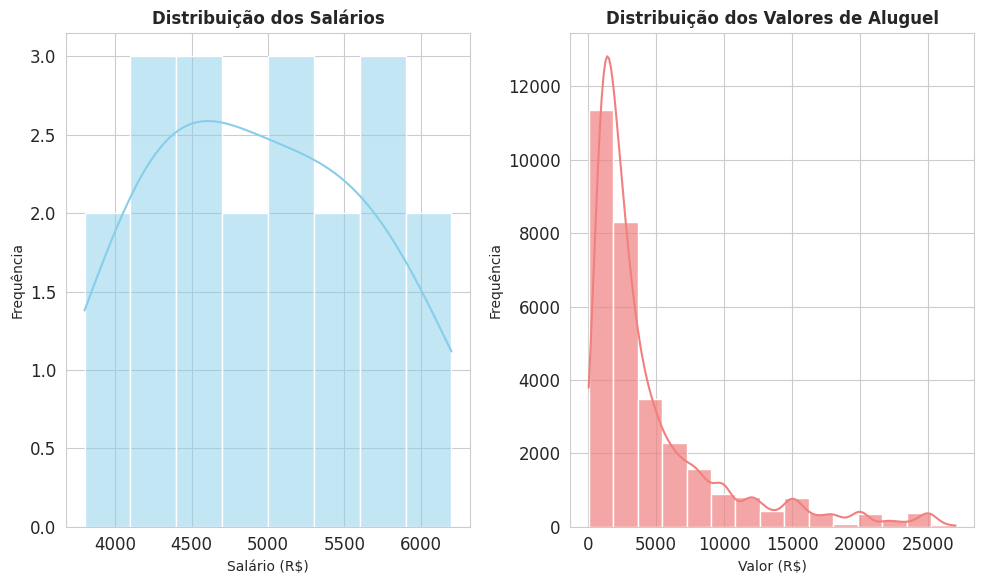

In [ ]:
# Histograma de salários
plt.subplot(1,2,1)
sns.histplot(data=salarios, x='salarios', bins=8, kde=True, color='skyblue')
plt.title('Distribuição dos Salários', fontsize=12, fontweight='bold')
plt.xlabel('Salário (R$)', fontsize=10)
plt.ylabel('Frequência', fontsize=10)

# Histograma de valores de aluguel
plt.subplot(1,2,2)
valores_limpos = casas['Valor'].dropna()

# Filtrar outliers extremos (acima do percentil 95) para melhor visualização
limite_superior = valores_limpos.quantile(0.95)
valores_filtrados = valores_limpos[valores_limpos <= limite_superior]

sns.histplot(data=valores_filtrados, bins=15, kde=True, color='lightcoral', alpha=0.7)
plt.title('Distribuição dos Valores de Aluguel', fontsize=12, fontweight='bold')
plt.xlabel('Valor (R$)', fontsize=10)
plt.ylabel('Frequência', fontsize=10)

plt.tight_layout()
plt.show()

### Desvendando os Boxplots (Gráficos de Caixa)

O boxplot pode parecer estranho à primeira vista, mas é na verdade um dos gráficos mais úteis que existem! Imagine que você quer entender rapidamente como estão distribuídos os salários na sua empresa, ou os preços dos imóveis numa região.

**Vamos "ler" um boxplot passo a passo:**

**A linha no meio da caixa** é a mediana - ou seja, o valor que fica bem no meio quando colocamos todos os números em ordem. Se a mediana dos salários é R$ 5.000, significa que metade das pessoas ganha menos que isso e metade ganha mais.

**A caixa em si** mostra onde estão concentrados 50% dos dados. Se a caixa é pequena, significa que a maioria das pessoas ganha valores parecidos. Se a caixa é grande, há muita variação nos salários.

**Os "bigodes" (linhas que saem da caixa)** mostram até onde vão os valores "normais". Tudo que está além dessas linhas são valores bem diferentes do comum.

**Os pontinhos isolados** são os "outliers" - valores muito diferentes do resto. No caso de salários, podem ser aqueles funcionários que ganham muito mais ou muito menos que o padrão da empresa.

**Por que o boxplot é tão útil?** Porque em um só gráfico, ele nos conta várias histórias: onde está o "centro" dos dados, quanta variação existe, se há valores muito extremos, e ainda permite comparar facilmente diferentes grupos (como tipos de imóveis, departamentos da empresa, etc.).

Quando você vê vários boxplots lado a lado, pode rapidamente identificar qual grupo tem valores maiores, qual tem mais variação, e qual tem mais "casos especiais".

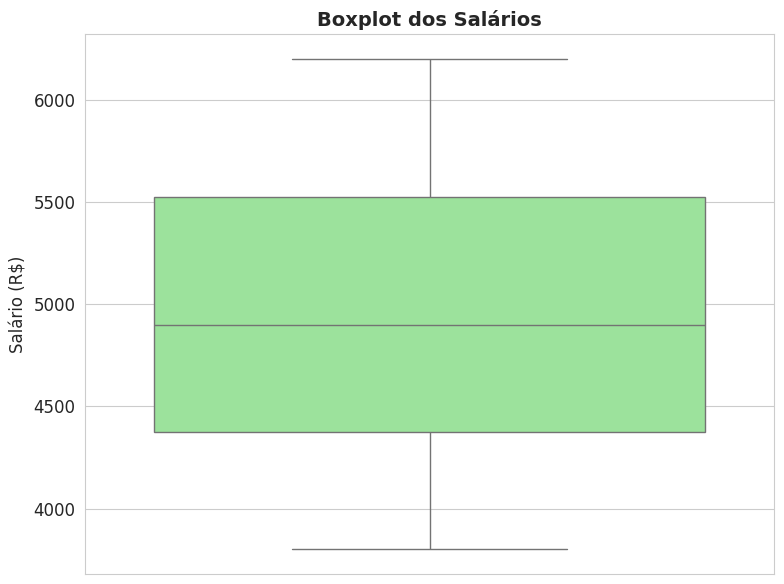

In [ ]:
# Boxplot de salários
plt.figure(figsize=(8, 6))

sns.boxplot(data=salarios, y='salarios', color='lightgreen')
plt.title('Boxplot dos Salários', fontsize=14, fontweight='bold')
plt.ylabel('Salário (R$)', fontsize=12)

plt.tight_layout()
plt.show()

Boxplot - Área dos Imóveis

Aqui aplicamos o mesmo conceito do boxplot, mas agora para as áreas dos imóveis em metros quadrados.

**O que observar:**
- **Tamanho típico** dos imóveis (mediana)
- **Variação** nas áreas (tamanho da caixa)
- **Imóveis excepcionalmente grandes ou pequenos** (outliers)

Este gráfico nos ajuda a entender se existem imóveis muito fora do padrão no nosso conjunto de dados.

**ATENÇÃO**: Nem todos os pontos mostrados como outliers pelo Boxplot são realmente outliers!

Casas com 400 m² ou mais: 3153


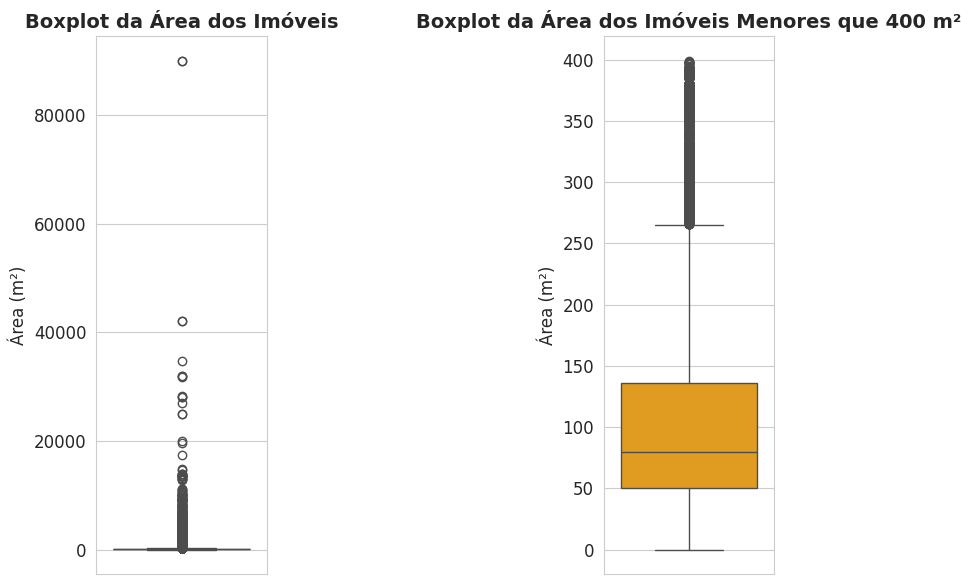

In [ ]:
# Boxplot de área dos imóveis
plt.figure(figsize=(8, 6))

# Eliminando dados vazios
area_limpa = casas['Area'].dropna()

# Boxplot da área dos imóveis
plt.subplot(1,3,1)
sns.boxplot(data=area_limpa, color='orange')
plt.title('Boxplot da Área dos Imóveis', fontsize=14, fontweight='bold')
plt.ylabel('Área (m²)', fontsize=12)

# Boxplot removendo as mansões (Área acima de 400 m²)
print("Casas com 400 m² ou mais:",len(area_limpa[area_limpa >= 400]))
casas_de_interesse = area_limpa[area_limpa < 400]
plt.subplot(1,3,3)
sns.boxplot(data=casas_de_interesse, color='orange')
plt.title('Boxplot da Área dos Imóveis Menores que 400 m²', fontsize=14, fontweight='bold')
plt.ylabel('Área (m²)', fontsize=12)

plt.tight_layout()
plt.show()

Gráfico de Barras - Distribuição por Número de Quartos

Este gráfico conta quantos imóveis temos para cada número de quartos (1 quarto, 2 quartos, 3 quartos, etc.).

**Informações importantes:**
- **Configuração mais comum** de quartos no mercado
- **Disponibilidade** de cada tipo de imóvel
- **Tendências** do mercado imobiliário da região

É útil para entender que tipo de imóvel é mais fácil ou difícil de encontrar.

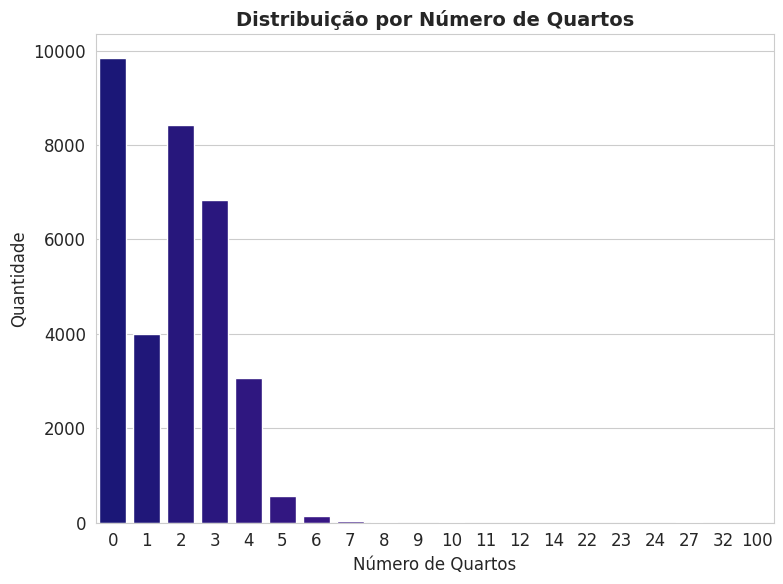

In [ ]:
# Gráfico de barras: distribuição por quartos
plt.figure(figsize=(8, 6))

quartos_counts = casas['Quartos'].value_counts().sort_index()
sns.barplot(x=quartos_counts.index, y=quartos_counts.values, hue=quartos_counts.index,
           palette='plasma', legend=False)
plt.title('Distribuição por Número de Quartos', fontsize=14, fontweight='bold')
plt.xlabel('Número de Quartos', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)

plt.tight_layout()
plt.show()

## Resumindo dados em medidas

### Média

A **média aritmética** é a soma de todos os valores dividida pela quantidade de observações:

$$\bar{x} = \frac{\sum_{i=1}^{N}x_i}{N} = \frac{x_1 + x_2 + ... + x_N}{N}$$

Características importantes:

- **Medida de localização**: nos diz onde os dados estão "centrados"
- **Pode não existir no conjunto**: a média pode ser um valor que não aparece nos dados originais
- **Sensível a outliers**: valores extremos podem "puxar" a média para cima ou para baixo

In [ ]:
# Cálculo da média dos salários
media_salarios = salarios['salarios'].mean()
print(f'Média dos salários: R$ {media_salarios:,.2f}')

# Visualizando todos os salários para comparação
print('\nTodos os salários:')
for i, sal in enumerate(salarios['salarios'], 1):
    print(f'  Pessoa {i}: R$ {sal:,}')

print(f'\nInterpretação: Em média, os salários estão em torno de R$ {media_salarios:,.2f}')

Média dos salários: R$ 4,940.00

Todos os salários:
  Pessoa 1: R$ 4,500
  Pessoa 2: R$ 5,200
  Pessoa 3: R$ 3,800
  Pessoa 4: R$ 6,100
  Pessoa 5: R$ 4,800
  Pessoa 6: R$ 5,500
  Pessoa 7: R$ 4,200
  Pessoa 8: R$ 5,800
  Pessoa 9: R$ 4,600
  Pessoa 10: R$ 5,000
  Pessoa 11: R$ 3,900
  Pessoa 12: R$ 6,200
  Pessoa 13: R$ 4,700
  Pessoa 14: R$ 5,300
  Pessoa 15: R$ 4,100
  Pessoa 16: R$ 5,700
  Pessoa 17: R$ 4,400
  Pessoa 18: R$ 5,600
  Pessoa 19: R$ 4,300
  Pessoa 20: R$ 5,100

Interpretação: Em média, os salários estão em torno de R$ 4,940.00


**Efeito dos outliers sobre a média**

In [ ]:
# Média dos aluguéis
media_valores = casas['Valor'].mean()
print(f'Média de valores de aluguel: R$ {media_valores:,.2f}')

# Removendo valores muito altos
Q3 = casas['Valor'].quantile(0.75)
limite_outlier = Q3 * 1.5
casas_sem_outlier = casas[casas['Valor'] < limite_outlier]
media_sem_outlier = casas_sem_outlier['Valor'].mean()
print(f'Média sem outliers (< R$ {limite_outlier:,.0f}): R$ {media_sem_outlier:,.2f}')
print(f'Diferença: R$ {media_valores - media_sem_outlier:,.2f}')
print(f'Os outliers aumentaram a média em {((media_valores/media_sem_outlier - 1) * 100):.1f}%!')

Média de valores de aluguel: R$ 12,952.66
Média sem outliers (< R$ 9,750): R$ 2,918.14
Diferença: R$ 10,034.52
Os outliers aumentaram a média em 343.9%!


### Desvio Padrão

**Problema**: A média nos diz onde os dados estão centralizados, mas **quanto eles variam** ao redor da média?

**Definição Matemática:**

**Desvio Padrão Amostral (usado pelo Pandas):**
$$s = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}}$$

**Passos do cálculo:**
1. Calcular a média: $\bar{x}$
2. Calcular os desvios: $(x_i - \bar{x})$
3. Elevar ao quadrado: $(x_i - \bar{x})^2$
4. Somar todos: $\sum(x_i - \bar{x})^2$
5. Dividir por $(n-1)$: Correção de Bessel
6. Tirar a raiz quadrada: $\sqrt{...}$

**Implementação no Pandas:**
```python
# Pandas usa ddof=1 por padrão (divisão por n-1)
desvio = df['coluna'].std()     # Amostra
desvio_pop = df['coluna'].std(ddof=0)  # População
```

**Interpretação:**
- **Unidade**: mesma dos dados originais
- **Baixo**: dados concentrados perto da média
- **Alto**: dados espalhados da média

In [ ]:
# Calculando estatísticas básicas dos salários
media_sal = salarios['salarios'].mean()
desvio_sal = salarios['salarios'].std()

salarios_na_faixa = salarios[(salarios.salarios > media_sal-desvio_sal) & (salarios.salarios < media_sal+desvio_sal)]
pct_na_faixa = len(salarios_na_faixa)/len(salarios)*100

print("RESUMO DOS SALÁRIOS DA EMPRESA")
print("=" * 40)
print(f"Salário médio: R$ {media_sal:,.0f}")
print(f"Desvio padrão: R$ {desvio_sal:,.0f}")
print()
print("O que isso significa na prática:")
print(f"   • Cerca de {pct_na_faixa:,.1f}% ganha entre R$ {media_sal - desvio_sal:,.0f} e R$ {media_sal + desvio_sal:,.0f}")
print(f"   • Isso representa a 'faixa normal' dos salários")

RESUMO DOS SALÁRIOS DA EMPRESA
Salário médio: R$ 4,940
Desvio padrão: R$ 724

O que isso significa na prática:
   • Cerca de 60.0% ganha entre R$ 4,216 e R$ 5,664
   • Isso representa a 'faixa normal' dos salários


### A "Regra dos 68%" - Um Truque da Natureza

**Você já reparou que a vida tem padrões?**

- A maioria das pessoas tem altura "normal" (nem muito alta, nem muito baixa)
- A maioria dos carros na rua anda na velocidade "normal"
- A maioria dos alunos tira notas "medianas"

Isso acontece em quase tudo na vida! E existe uma regra matemática que explica isso.

**A Regra dos 68% diz assim:**
> "Em coisas que seguem o padrão normal da vida, aproximadamente 68% ficam 'perto' da média"

**"Perto" significa o quê?**
Perto significa dentro de 1 "desvio padrão" - que é como medimos o quanto os dados se espalham.

**Atenção**: Nem todas as variáveis seguem esta regra.


## Variância

### O que é a Variância?

**Problema**: Como medir variabilidade sem depender de unidades?

#### Definição Matemática:

**Variância Amostral (Pandas):**
$$s^2 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}$$

**Relação com Desvio Padrão:**
$$s^2 = (\text{desvio padrão})^2$$
$$s = \sqrt{s^2}$$

#### Implementação Pandas:
```python
variancia = df['coluna'].var()     # ddof=1
desvio = df['coluna'].std()       # ddof=1
# Relação: variancia = desvio ** 2
```

#### Diferenças Importantes:

| Medida | Unidade | Interpretação |
|--------|---------|----------------|
| **Desvio Padrão** | Mesma dos dados | Fácil de interpretar |
| **Variância** | Quadrado da unidade | Usada em cálculos |

#### Quando Usar:
- **Variância**: Cálculos matemáticos, testes estatísticos
- **Desvio Padrão**: Interpretação e comunicação


In [ ]:
# Variância: Cálculo e Relação com Desvio Padrão
# Cálculos com Pandas
variancia_sal = salarios['salarios'].var()
desvio_sal = salarios['salarios'].std()

print(f"pandas.var(): {variancia_sal:,.2f} R$²")
print(f"pandas.std(): {desvio_sal:,.2f} R$")
print(f"Relação: std² = ({desvio_sal:.2f})² = {desvio_sal**2:,.2f} ≈ var")

pandas.var(): 523,578.95 R$²
pandas.std(): 723.59 R$
Relação: std² = (723.59)² = 523,578.95 ≈ var


### Entendendo a Diferença: Desvio Padrão vs Variância

**Uma analogia para começar:**
Imagine que você quer medir o quão "espalhados" estão os salários na sua empresa. É como medir a "bagunça" ou "organização" dos dados.

**A variância é o primeiro passo:**
- Ela mede o quanto cada salário "se afasta" da média
- Mas para calcular isso, elevamos essas diferenças ao quadrado
- Resultado: se os salários estão em "reais", a variância fica em "reais ao quadrado"
- Por exemplo: se a variância é 625.000.000, isso significa "625 milhões de reais²"

**O desvio padrão é mais intuitivo:**
- É a raiz quadrada da variância
- Volta para a unidade original dos dados
- Se a variância é 625.000.000 reais², o desvio padrão é 25.000 reais
- Agora posso dizer: "Os salários tipicamente variam R$ 25.000 da média"

**Por que precisamos dos dois?**

**Variância:**
- Essencial para cálculos estatísticos mais complexos
- Usada em fórmulas matemáticas
- Cada diferença da média tem "peso maior" por causa do quadrado

**Desvio Padrão:**
- Perfeito para interpretar e comunicar resultados
- Mantém a mesma unidade dos dados originais
- Mais fácil de visualizar e entender

**Relação matemática:**
- Desvio Padrão = √(Variância)
- Se variância = 625.000.000, então desvio padrão = 25.000

**Na prática:**
- Para **explicar** resultados → use desvio padrão
- Para **calcular** outras estatísticas → use variância
- Ambos medem a mesma coisa: o quanto os dados se espalham

A diferença é apenas na unidade e facilidade de interpretação!

### Comparando Desvio Padrão e Variância

Vamos visualizar a diferença entre essas duas medidas de dispersão.

In [ ]:
# Comparando unidades e valores
print(f'DIFERENÇA DE UNIDADES:')
print(f'Dados originais: Reais (R$)')
print(f'Desvio Padrão: {desvio_sal:,.0f} R$')
print(f'Variância: {variancia_sal:,.0f} R$²')
print(f'Por isso preferimos o desvio padrão para interpretação!')

DIFERENÇA DE UNIDADES:
Dados originais: Reais (R$)
Desvio Padrão: 724 R$
Variância: 523,579 R$²
Por isso preferimos o desvio padrão para interpretação!


Variância é importante para cálculos, mas desvio padrão é melhor para interpretação!

## Mediana

### O que é a Mediana?

**Problema**: Outliers podem "puxar" a média para valores não representativos. A **mediana** é mais robusta!

#### Definição Matemática:

Para dados **ordenados** $x_1 \leq x_2 \leq ... \leq x_n$:

**Se n é ímpar:**
$$\text{Mediana} = x_{\frac{n+1}{2}}$$

**Se n é par:**
$$\text{Mediana} = \frac{x_{\frac{n}{2}} + x_{\frac{n}{2}+1}}{2}$$

#### Implementação Pandas:
```python
# Pandas ordena automaticamente e aplica a fórmula
mediana = df['coluna'].median()
# Equivale a: np.percentile(dados, 50)
```

#### Algoritmo:
1. **Ordenar** os dados: $x_1, x_2, ..., x_n$
2. **Verificar** se $n$ é par ou ímpar
3. **Aplicar** a fórmula correspondente

#### Robustez aos Outliers:
```
Dados: [3, 4, 5, 6] → Mediana = 4.5
Dados: [3, 4, 5, 1000] → Mediana = 4.5 (igual!)
```

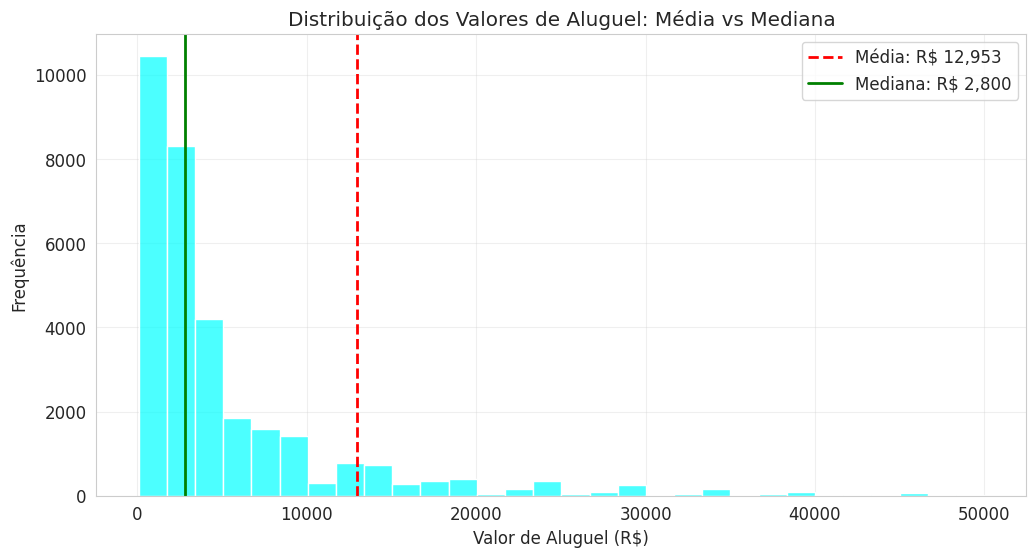

In [ ]:
# Visualização: Média vs Mediana dos Valores de Aluguel
media = casas['Valor'].mean()
mediana = casas['Valor'].median()

# Filtrando para melhor visualização (valores até R$ 50.000)
casas_filtradas = casas[casas['Valor'] < 50000]

plt.figure(figsize=(12, 6))
sns.histplot(data=casas_filtradas, x='Valor', bins=30, alpha=0.7, color='cyan')
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Média: R$ {media:,.0f}')
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: R$ {mediana:,.0f}')
plt.title('Distribuição dos Valores de Aluguel: Média vs Mediana')
plt.xlabel('Valor de Aluguel (R$)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Entendendo Média vs Mediana no Mercado Imobiliário

Vamos começar com um conceito importante: nem sempre a "média" representa bem o que é "típico" nos nossos dados. É aqui que entra a **mediana**, uma alternativa muito útil!

**O que é a mediana?** É simplesmente o valor que fica "no meio" quando organizamos todos os números em ordem crescente. Se temos 100 preços de imóveis em ordem, a mediana é o preço que fica na posição 50 - metade dos imóveis custa menos, metade custa mais.

**O que é a média?** É o que normalmente chamamos de "média aritmética" - somamos todos os valores e dividimos pela quantidade.

**Por que são diferentes no mercado imobiliário?**

Imagine uma rua com 10 casas: 9 casas custam entre R\$ 300.000 e R\$ 400.000, mas 1 casa é uma mansão de R\$ 2.000.000.

- A **média** seria puxada para cima pela mansão, dando algo como R$ 560.000
- A **mediana** seria cerca de R\$ 350.000, representando melhor o que a maioria das casas realmente custa

**No nosso gráfico:**
- A **linha vermelha tracejada** mostra a média dos aluguéis
- A **linha verde sólida** mostra a mediana dos aluguéis

Se a linha vermelha está bem à direita da verde, isso nos conta uma história interessante: temos alguns aluguéis muito caros que estão "puxando" a média para cima, mas a maioria dos aluguéis está numa faixa mais baixa.

**Por que isso importa na prática?**
- Se você é um inquilino procurando apartamento, a **mediana** te dá uma ideia melhor do que você vai encontrar tipicamente no mercado
- Se você é um investidor calculando retorno médio, a **média** pode ser mais relevante para seus cálculos
- Para políticas públicas de habitação, a **mediana** ajuda a entender o que é acessível para a maioria da população

Essa diferença entre média e mediana é muito comum em dados de renda, preços de imóveis, e qualquer situação onde temos alguns valores muito altos que podem distorcer nossa percepção do que é "normal".

In [ ]:
# Calculando média e mediana dos salários
media_sal = salarios['salarios'].mean()
mediana_sal = salarios['salarios'].median()

print(f"Média dos salários: R$ {media_sal:,.0f}")
print(f"Mediana dos salários: R$ {mediana_sal:,.0f}")
print(f"Diferença: R$ {abs(media_sal - mediana_sal):,.0f}")

Média dos salários: R$ 4,940
Mediana dos salários: R$ 4,900
Diferença: R$ 40


# Análise Exploratória de Dados 2D: Investigando Relações

**Qual a relação de uma coisa com outra?**

Agora vamos aprender a investigar a relação entre duas variáveis ou "características" dos nossos dados. Isso é o que chamamos de Análise Exploratória de Dados (EDA) em 2D.

Imagine que temos uma lista com informações sobre alunos, como altura e peso. Será que alunos mais altos são também mais pesados? A análise 2D nos ajuda a responder perguntas como essa, encontrando padrões e relações nos dados.

Como vimos, a alta concentração de dados no dataset de imóveis pode dificultar a visualização clara de uma correlação. Para explorar este conceito de forma mais didática, vamos usar o dataset sobre medidas dos pés de crianças de uma quarta série.

Este conjunto de dados, apesar de pequeno (39 observações), é excelente para o nosso propósito. Ele contém variáveis como Length (comprimento do pé) e Width (largura do pé), e foi coletado para investigar se os pés dos meninos são, de fato, mais largos que os das meninas. Com ele, podemos responder de forma visual à pergunta: "Existe uma relação entre o comprimento e a largura dos pés?"

## **Analisando Dados Categóricos**

O objetivo desta análise é investigar a possível relação entre o sexo das crianças e qual pé foi medido. Essas variáveis são consideradas "categóricas", pois classificam os indivíduos em grupos específicos.

In [ ]:
# O comando !wget baixa o arquivo do link especificado
!wget http://jse.amstat.org/datasets/kidsfeet.dat.txt
pes = pd.read_csv("kidsfeet.dat.txt",
                  sep='\s+',
                  header=None,
                  names=["Birthmonth", "Birthyear", "Length", "Width", "Sex", "Foot", "Right_Left_handedness"])

--2025-10-03 11:38:55--  http://jse.amstat.org/datasets/kidsfeet.dat.txt
Resolving jse.amstat.org (jse.amstat.org)... 192.124.249.169
Connecting to jse.amstat.org (jse.amstat.org)|192.124.249.169|:80... connected.
HTTP request sent, awaiting response... 

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2294083657.py:4: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',


301 Moved Permanently
Location: https://jse.amstat.org/datasets/kidsfeet.dat.txt [following]
--2025-10-03 11:38:55--  https://jse.amstat.org/datasets/kidsfeet.dat.txt
Connecting to jse.amstat.org (jse.amstat.org)|192.124.249.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1638 (1.6K) [text/plain]
Saving to: ‘kidsfeet.dat.txt’

kidsfeet.dat.txt    100%[===================>]   1.60K  --.-KB/s    in 0s      

2025-10-03 11:38:55 (496 MB/s) - ‘kidsfeet.dat.txt’ saved [1638/1638]



### **Gráfico de Barras Agrupadas**

Este gráfico é bom para contagens, mas pode ser difícil comparar as categorias quando elas estão lado a lado.

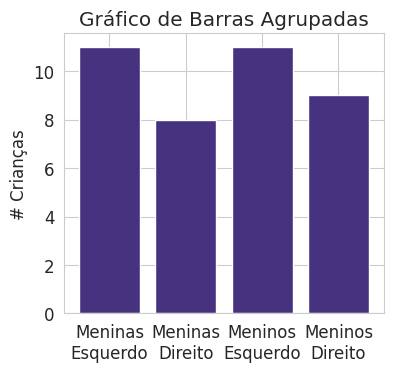

In [ ]:
# Primeiro, vamos criar as categorias que queremos analisar
# (Menina, Pé Esquerdo), (Menina, Pé Direito), (Menino, Pé Esquerdo), (Menino, Pé Direito)
categorias = [("G","L"), ("G","R"), ("B","L"), ("B","R")]

# Agora, vamos contar quantas crianças existem para cada categoria
dados = {}
for cat in categorias:
  # Aqui filtramos a tabela para cada sexo (cat[0]) e pé (cat[1]) e contamos (.count())
  dados[cat] = pes.Foot[(pes.Sex == cat[0]) & (pes.Foot == cat[1])].count()

# Criamos uma figura para nossos gráficos
plt.figure(figsize=(14, 8))

# Gráfico 1: Barras Agrupadas
plt.subplot(2, 3, 1) # Cria uma área para o primeiro gráfico em um painel de 2x3
plt.bar(range(len(dados)), list(dados.values()), align='center')
plt.xticks(range(len(dados)), ['Meninas\nEsquerdo', 'Meninas\nDireito', 'Meninos\nEsquerdo', 'Meninos\nDireito'])
plt.ylabel("# Crianças")
plt.title("Gráfico de Barras Agrupadas")

plt.show()

Observe como é preciso "pular" as barras para comparar, por exemplo, o pé esquerdo de meninas com o de meninos

### **Gráfico de Barras Empilhadas**

Uma solução melhor é empilhar as barras. Assim, a comparação fica mais visual e direta.

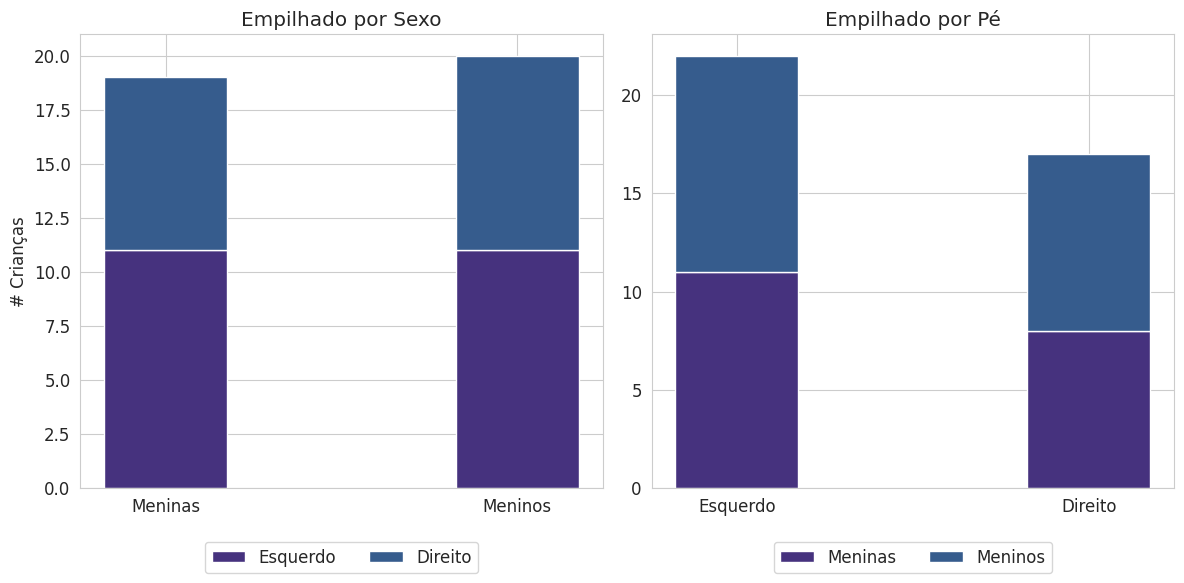

In [ ]:
# Criamos a figura para abrigar os gráficos
plt.figure(figsize=(12, 6))

# --- Gráfico 1 (à esquerda) ---
plt.subplot(1, 2, 1)
esquerdo = [dados[("G","L")], dados[("B","L")]]
direito = [dados[("G","R")], dados[("B","R")]]
plt.bar(range(2), esquerdo, label="Esquerdo", width=0.35)
plt.bar(range(2), direito, label="Direito", width=0.35, bottom=esquerdo)
plt.xticks(range(2), ["Meninas", "Meninos"])
plt.ylabel("# Crianças")
plt.title("Empilhado por Sexo")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# --- Gráfico 2 (à direita) ---
plt.subplot(1, 2, 2)
meninas = [dados[("G","L")], dados[("G","R")]]
meninos = [dados[("B","L")], dados[("B","R")]]
plt.bar(range(2), meninas, label="Meninas", width=0.35)
plt.bar(range(2), meninos, label="Meninos", width=0.35, bottom=meninas)
plt.xticks(range(2), ["Esquerdo", "Direito"])
plt.title("Empilhado por Pé")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.tight_layout()
plt.show()

Com as barras empilhadas, fica bem mais fácil visualizar e comparar as contagens

### **Gráfico de Setores (Pizza)**

Este tipo de gráfico é útil quando queremos ver a proporção de cada categoria no todo. No nosso caso, as 4 categorias formam 100% dos dados. No entanto, é difícil comparar o tamanho exato das "fatias", então use com moderação.

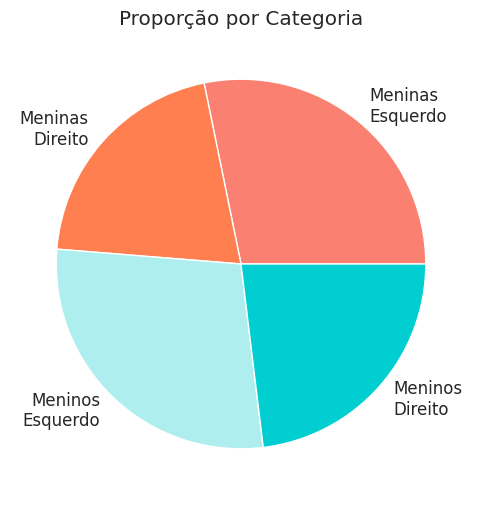

In [ ]:
plt.figure(figsize=(8, 6))

# Gráfico 4: Pizza
plt.pie(list(dados.values()),
        labels=["Meninas\nEsquerdo", "Meninas\nDireito", "Meninos\nEsquerdo", "Meninos\nDireito"],
        colors=["salmon", "coral", "paleturquoise", "darkturquoise"])
plt.title("Proporção por Categoria")
plt.show()

### **Mapas de Calor (Heatmaps)**

Mapas de calor são excelentes para visualizar dados em formato de tabela, onde a cor de cada célula representa um valor. É uma forma muito visual de comparar múltiplas categorias ao mesmo tempo.

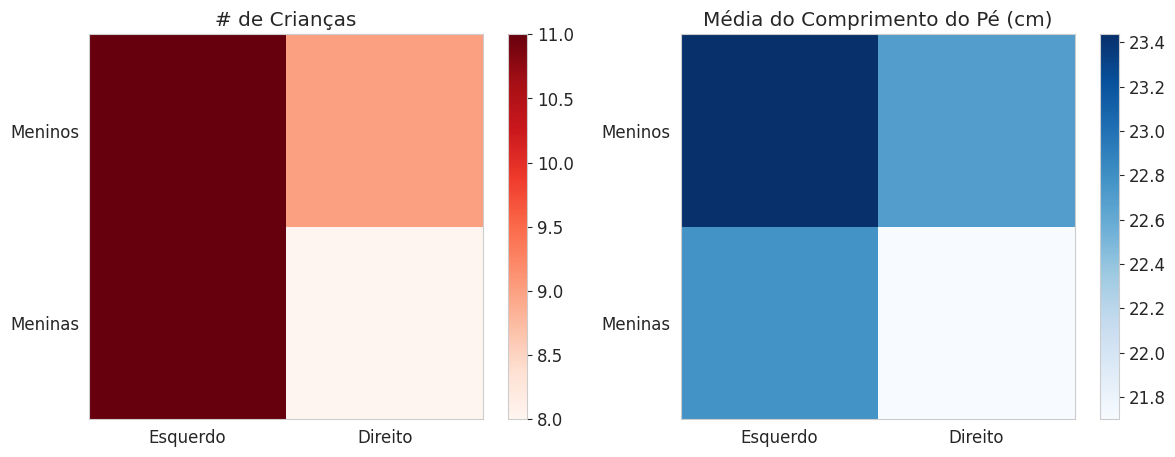

In [ ]:
plt.figure(figsize=(14, 5))

# Gráfico 5: Mapa de Calor da Contagem
plt.subplot(1, 2, 1)
# Reorganizamos nossos dados em uma matriz 2x2 (sexo vs. pé)
dadosMatrizContagem = np.array(list(dados.values())).reshape(2, 2)
# A função pcolormesh cria o mapa de calor
plt.pcolormesh(dadosMatrizContagem, cmap="Reds")
# Ajustamos os nomes dos eixos para ficarem centralizados
plt.yticks(np.arange(2) + 0.5, ["Meninas", "Meninos"])
plt.xticks(np.arange(2) + 0.5, ["Esquerdo", "Direito"])
plt.title("# de Crianças")
plt.colorbar() # Adiciona a barra de cores como referência

# E se quisermos ver a média do comprimento do pé em vez da contagem?
dados_media = {}
for cat in categorias:
  # Agora, em vez de .count(), usamos .mean() para calcular a média
  dados_media[cat] = pes.Length[(pes.Sex == cat[0]) & (pes.Foot == cat[1])].mean()

# Gráfico 6: Mapa de Calor da Média do Comprimento
plt.subplot(1, 2, 2)
dadosMatrizMedia = np.array(list(dados_media.values())).reshape(2, 2)
plt.pcolormesh(dadosMatrizMedia, cmap="Blues") # Mudamos a cor para diferenciar
plt.yticks(np.arange(2) + 0.5, ["Meninas", "Meninos"])
plt.xticks(np.arange(2) + 0.5, ["Esquerdo", "Direito"])
plt.title("Média do Comprimento do Pé (cm)")
plt.colorbar()

plt.show()

**Resumo:** Existe uma variedade de ferramentas para dados categóricos. Não há regras estritas de quando usar cada um, mas normalmente evita-se os gráficos de setores (ângulos são difícies de medir "no olho") e de barras 3D (barras podem esconder outras barras).

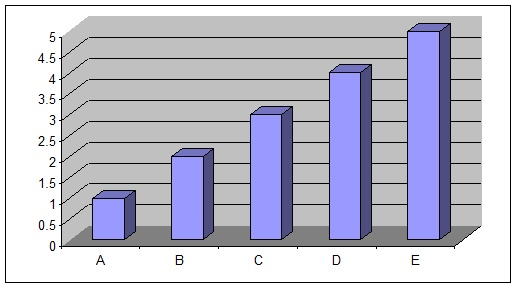

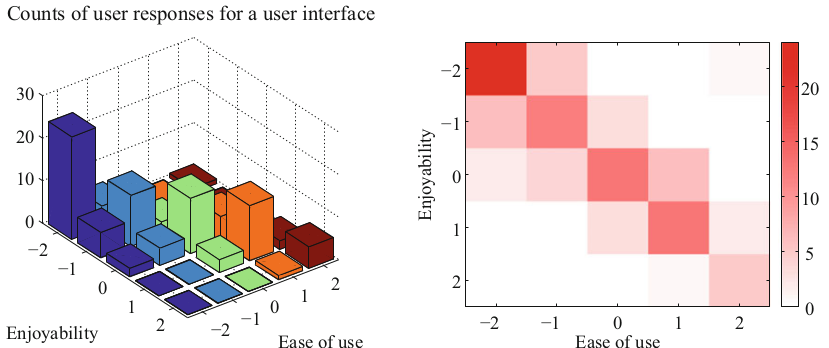

## **Gráficos de Dispersão e Correlação**

E quando queremos ver a relação entre duas variáveis numéricas, como o comprimento e a largura dos pés? Para isso, usamos o gráfico de dispersão (scatter plot).

### **O que é um Gráfico de Dispersão?**

É um gráfico onde cada ponto representa uma observação (no nosso caso, uma criança), posicionado de acordo com seus valores em dois eixos (x e y). Ele é perfeito para vermos se existe uma tendência ou padrão na relação entre as duas variáveis.

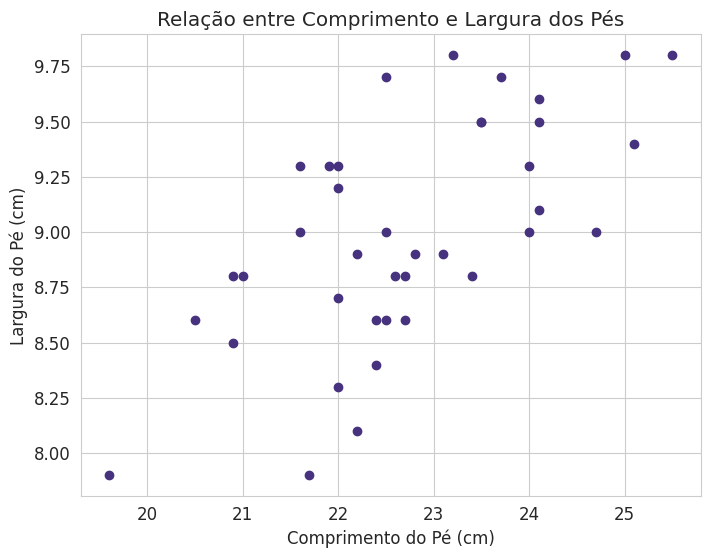

In [ ]:
# Criamos um gráfico de dispersão com o comprimento no eixo X e a largura no eixo Y
plt.figure(figsize=(8, 6))
plt.scatter(pes.Length, pes.Width)
plt.xlabel("Comprimento do Pé (cm)")
plt.ylabel("Largura do Pé (cm)")
plt.title("Relação entre Comprimento e Largura dos Pés")
plt.show()

Interpretação: Olhando para o gráfico, notamos que os pontos formam um padrão que sobe da esquerda para a direita. Isso indica que, em geral, pés mais compridos também são mais largos.

## **Medindo a Relação: Coeficiente de Correlação de Pearson (r)**

Podemos medir a força e a direção dessa relação linear com um número, chamado de Coeficiente de Correlação de Pearson, ou simplesmente r.



*   r perto de +1: Correlação positiva forte (quando um sobe, o outro sobe).
*   r perto de -1: Correlação negativa forte (quando um sobe, o outro desce).
*   r perto de 0: Não há correlação linear.









In [ ]:
# Calcula a correlação entre as duas colunas
correlacao = pes['Length'].corr(pes['Width'])


print(f"O coeficiente de correlação de Pearson (r) é: {correlacao:.4f}")

O coeficiente de correlação de Pearson (r) é: 0.6411


Agora, vamos gerar um gráfico de dispersão para visualizar essa relação.

## **A Direção da Relação (O Sinal de r)**

O sinal do coeficiente r (positivo ou negativo) nos diz para onde a relação aponta. Isso é visualmente representado pela inclinação da linha de tendência no gráfico.
*  Sinal Positivo (+): Indica uma correlação positiva. No gráfico, isso se traduz em uma linha de tendência que sobe da esquerda para a direita. Quando uma variável aumenta, a outra também tende a aumentar.
*   Sinal Negativo (-): Indica uma correlação negativa. No gráfico, a linha de tendência desce da esquerda para a direita. Quando uma variável aumenta, a outra tende a diminuir.

## **A Força da Relação (O Valor de r)**

O valor absoluto de r (o quão perto ele está de 1 ou -1) nos diz o quão forte é a relação linear. Isso é visualmente representado pela dispersão dos pontos em torno da linha de tendência.



*  Valor perto de 1 ou -1 (Forte): A relação é forte. No gráfico, os pontos estão bem agrupados e próximos da linha de tendência.
*  Valor perto de 0 (Fraca): A relação é fraca ou inexistente. No gráfico, os pontos estão muito espalhados e distantes da linha de tendência.

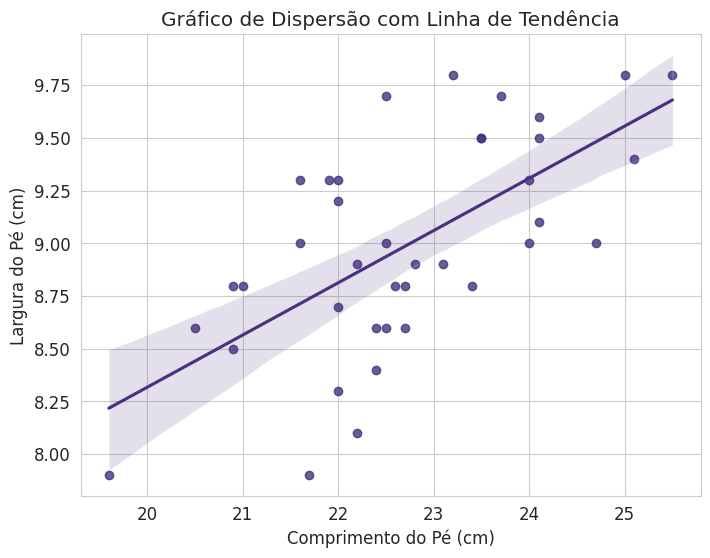

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x="Length", y="Width", data=pes)
plt.xlabel("Comprimento do Pé (cm)")
plt.ylabel("Largura do Pé (cm)")
plt.title("Gráfico de Dispersão com Linha de Tendência")
plt.show()

### **Adicionando uma Terceira Dimensão com Cor**
Podemos enriquecer nosso gráfico de dispersão adicionando uma terceira variável, desta vez categórica (como o sexo), usando cores diferentes para cada categoria.

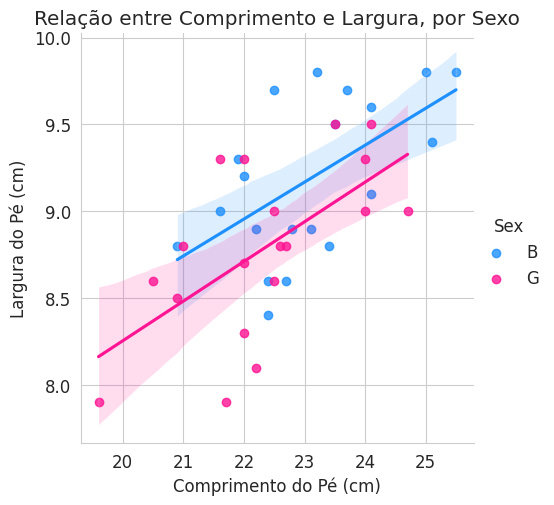

In [ ]:
# A função lmplot cria o gráfico, usando a coluna 'Sex' para a cor (hue)
# Adicionamos o argumento 'palette' para definir as cores manualmente
sns.lmplot(x="Length",
           y="Width",
           hue="Sex",
           data=pes,
           # Aqui definimos um dicionário de cores:
           # A categoria 'B' (Boy) será azul e a 'G' (Girl) será rosa.
           palette={"B": "dodgerblue", "G": "deeppink"})

plt.xlabel("Comprimento do Pé (cm)")
plt.ylabel("Largura do Pé (cm)")
plt.title("Relação entre Comprimento e Largura, por Sexo")
plt.show()

Agora podemos ver as tendências para meninos (B) e meninas (G) separadamente. Parece que a relação é semelhante para ambos, mas os pés dos meninos tendem a ser um pouco maiores em ambas as dimensões.

## **Correlação NÃO Implica Causalidade!**
Este é um dos conceitos mais importantes em análise de dados! Só porque duas variáveis estão correlacionadas, não significa que uma CAUSA a outra, ou ainda, que uma DEPENDE da outra.

Exemplo clássico: O consumo de sorvete e o número de afogamentos em uma cidade são positivamente correlacionados (quando um aumenta, o outro também). Isso significa que tomar sorvete causa afogamentos? Não! A verdadeira causa é o verão (uma terceira variável). No verão, as pessoas tomam mais sorvete e também nadam mais, o que aumenta a chance de afogamentos.

Correlações podem acontecer por:



*   Acidente: pequenos conjuntos de observações podem parecer correlacionados
*   Identidade: a variável A pode ser computada diretamente da variável B
*   Relação causal direta: há relação entre velocidade e deslocamento de um veículo
*   Relação causal implícita: pode haver uma variável latente que seja a causa das mudanças em ambas as variáveis

Exemplo: A idade da criança é a variável latente, crianças mais jovens tendem a ter pés pequenos e menor capacidade de leitura (já que tem menos prática). Crianças de mais idade tendem a ter pés maiores e maior capacidade de leitura (tem mais tempo praticando).

# O Projeto

O projeto será executado em duplas. Seu objetivo é carregar os dados em um Notebook e realizar análises dos dados em busca de explicações para a variável "stress_level", identificando quais fatores acadêmicos, sociais, emocionais e de saúde são os indicadores mais significativos para determinar o nível de estresse do aluno.

### Os dados

Nós analisaremos os conjuntos de dados de monitoramento de estresse do aluno

Compreendendo as causas subjacentes para o stress e seu impacto nos alunos de hoje.

O presente conjunto de dados investiga as causas do estresse entre estudantes de escolas americanas. Ele busca compreender os fatores psicológicos, fisiológicos, ambientais, acadêmicos e sociais que influenciam o nível de estresse dos alunos.

**Número de variáveis (colunas)**: 21

**Variável alvo**: `stress_level`. Nível de estresse categórico reportado pelo estudante. Esta variável é medida em uma escala de 3 pontos:
*   0:   Baixo/Normal
*   1:   Moderado
*   2:   Alto

**Tipos de dados**: numéricos.
Todas as variáveis a seguir foram organizadas em cinco categorias principais:

- **Fatores Psicológicos**
    - `anxiety_level`: intensidade da ansiedade. (Escala numérica de 0, menos ansioso, a 30, mais ansioso.)
    - `self_esteem`: nível de autoestima. (Escala numérica de 0 a 30.)
    - `mental_health_history`: histórico de saúde mental (Escala binária: 0 = não, 1 = sim).
    - `depression`: grau de sintomas depressivos. (Escala numérica de 0 a 30.)

- **Fatores Fisiológicos**
    - `blood_pressure`: alterações de pressão arterial. (Escala com 3 níveis: 0 (Normal), 1 (Elevada), 2 (Alta).)

As demais variáveis foram medidas utilizando uma escala Likert de 5 pontos, que representa a frequência ou intensidade de cada fator. A escala é:
*   0: Nunca
*   1: Raramente
*   2: Às vezes
*   3: Frequentemente
*   4: Sempre

- **Fatores Fisiológicos**
    - `headache`: frequência de dores de cabeça.
    - `sleep_quality`: qualidade do sono.
    - `breathing_problem`: problemas respiratórios.

- **Fatores Ambientais**
    - `noise_level`: nível de ruído no ambiente.
    - `living_conditions`: condições de moradia.
    - `safety`: percepção de segurança.
    - `basic_needs`: atendimento das necessidades básicas.

- **Fatores Acadêmicos**
    - `academic_performance`: desempenho escolar.
    - `study_load`: carga de estudos.
    - `teacher_student_relationship`: qualidade da relação com professores.
    - `future_career_concerns`: preocupações com a carreira futura.

- **Fatores Sociais**
    - `social_support`: nível de suporte social.
    - `peer_pressure`: pressão dos colegas.
    - `extracurricular_activities`: envolvimento em atividades extracurriculares.
    - `bullying`: experiências de bullying.

**Possibilidades de Análise**
- Identificar quais categorias têm maior impacto no estresse estudantil.
- Verificar relações entre desempenho acadêmico, saúde mental e apoio social.